# DATASET OF USER CAR DATA ANALYTICS
# Exploratory Data Analysis
# Trend Analysis
# Seasonal Trend Analysis
# Correlation Analysis

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway

In [81]:
ucd = pd.read_csv('C:\\Users\\salig\\Downloads\\UserCarData.csv')

In [82]:
ucd

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,Hyundai,2013,320000,110000,Central,Texas,Plano,Petrol,Individual,Manual,First_Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5,N
7902,8125,Hyundai,2007,135000,119000,Central,Texas,Port Arthur,Diesel,Individual,Manual,Fourth_Above_Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,N
7903,8126,Maruti,2009,382000,120000,Central,Texas,Port Arthur,Diesel,Individual,Manual,First_Owner,19.30,1248,73.90,190Nm@ 2000rpm,5,N
7904,8127,Tata,2013,290000,25000,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First_Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5,N


In [83]:
ucd.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven', 'Region',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'sold'],
      dtype='object')

# EXPLORATORY ANALYSIS

# 1. How does the distribution of selling price vary by year for cars sold in different regions of India?

In [84]:
print(ucd.head())

   Sales_ID     name  year  selling_price  km_driven   Region  \
0         1   Maruti  2014         450000     145500     East   
1         2    Skoda  2014         370000     120000     East   
2         3    Honda  2006         158000     140000  Central   
3         4  Hyundai  2010         225000     127000  Central   
4         5   Maruti  2007         130000     120000     East   

      State or Province           City    fuel seller_type transmission  \
0  District of Columbia     Washington  Diesel  Individual       Manual   
1              New York  New York City  Diesel  Individual       Manual   
2              Illinois        Chicago  Petrol  Individual       Manual   
3              Illinois        Chicago  Diesel  Individual       Manual   
4              New York  New York City  Petrol  Individual       Manual   

          owner  mileage  engine  max_power                    torque  seats  \
0   First_Owner    23.40    1248      74.00            190Nm@ 2000rpm      5  

In [85]:
print(ucd.describe())

          Sales_ID         year  selling_price     km_driven      mileage  \
count  7906.000000  7906.000000   7.906000e+03  7.906000e+03  7906.000000   
mean   4070.106248  2013.983936   6.498137e+05  6.918866e+04    19.419861   
std    2345.770159     3.863695   8.135827e+05  5.679230e+04     4.036263   
min       1.000000  1994.000000   2.999900e+04  1.000000e+00     0.000000   
25%    2037.250000  2012.000000   2.700000e+05  3.500000e+04    16.780000   
50%    4076.500000  2015.000000   4.500000e+05  6.000000e+04    19.300000   
75%    6102.000000  2017.000000   6.900000e+05  9.542500e+04    22.320000   
max    8128.000000  2020.000000   1.000000e+07  2.360457e+06    42.000000   

            engine    max_power        seats  
count  7906.000000  7906.000000  7906.000000  
mean   1458.708829    91.587374     5.416393  
std     503.893057    35.747216     0.959208  
min     624.000000    32.800000     2.000000  
25%    1197.000000    68.050000     5.000000  
50%    1248.000000    82

In [86]:
print(ucd.isnull().sum())

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64


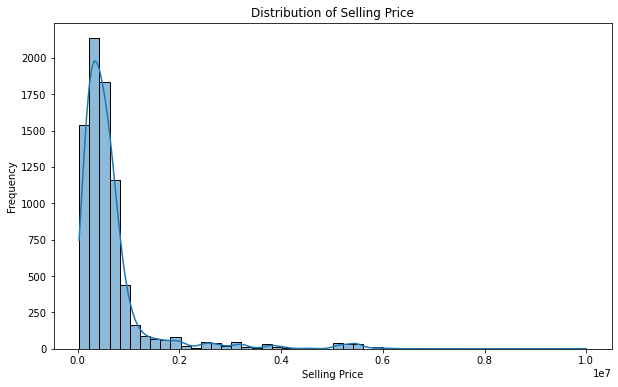

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(ucd['selling_price'], bins=50, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

# 2. What are the most common car sold in the used car market selling price by year?

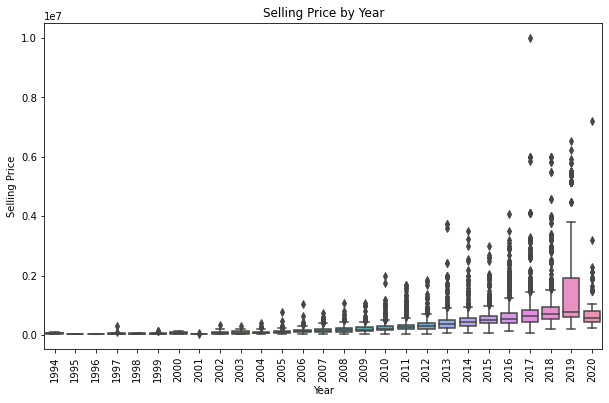

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='selling_price', data=ucd)
plt.title('Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.show()

# 3. Is there a significant difference in selling price between different states or provinces?

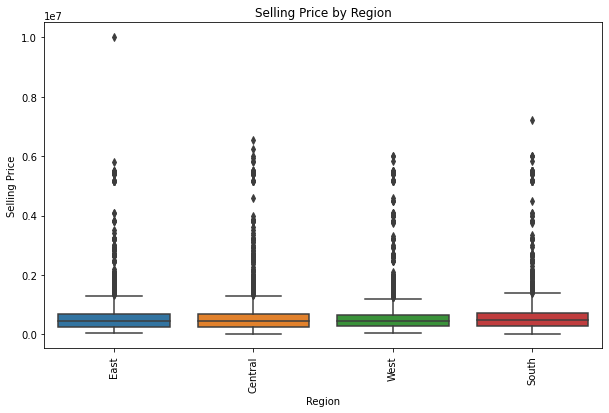

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='selling_price', data=ucd)
plt.title('Selling Price by Region')
plt.xlabel('Region')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.show()

# 4. What is the distribution of car ownership (first owner, second owner, etc.) in the used car market?

In [90]:
ucd_type_by_name = ucd.groupby('name')['owner'].value_counts().unstack().fillna(0)
print(ucd_type_by_name)

owner       First_Owner  Fourth_Above_Owner  Second_Owner  Test_Drive_Car  \
name                                                                        
Ambassador          0.0                 0.0           3.0             0.0   
Ashok               0.0                 0.0           1.0             0.0   
Audi               28.0                 1.0           7.0             3.0   
BMW               101.0                 1.0          15.0             0.0   
Chevrolet         113.0                11.0          81.0             0.0   
Daewoo              3.0                 0.0           0.0             0.0   
Datsun             57.0                 0.0           7.0             0.0   
Fiat               24.0                 0.0          12.0             0.0   
Force               4.0                 0.0           2.0             0.0   
Ford              252.0                 5.0         109.0             0.0   
Honda             340.0                 1.0          90.0             1.0   

# 5. How many sold based on the Sales_ID from the datasets?

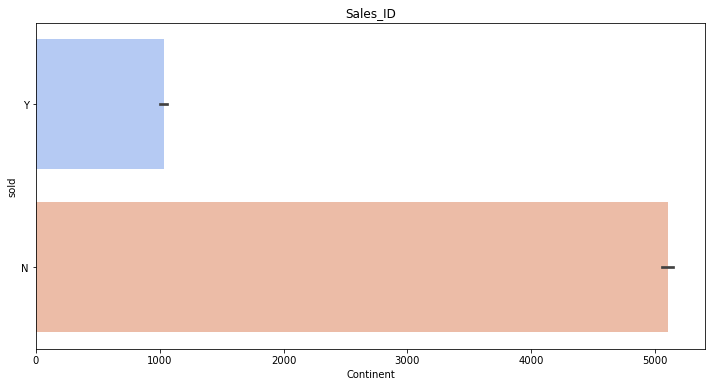

In [91]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales_ID', y='sold', data=ucd, palette='coolwarm')
plt.title('Sales_ID')
plt.xlabel('Continent')
plt.ylabel('sold')
plt.show()

# TREND ANALYSIS

# 6. Distribution Trends of average selling price over the years?

In [92]:
avg_price_per_year = ucd.groupby('year')['selling_price'].mean().reset_index()

In [93]:
print(avg_price_per_year)

    year  selling_price
0   1994   7.200000e+04
1   1995   5.500000e+04
2   1996   4.100000e+04
3   1997   8.611100e+04
4   1998   5.788889e+04
5   1999   7.692857e+04
6   2000   7.646093e+04
7   2001   4.650000e+04
8   2002   1.037894e+05
9   2003   1.015729e+05
10  2004   1.094089e+05
11  2005   1.437566e+05
12  2006   1.704622e+05
13  2007   1.791065e+05
14  2008   2.055598e+05
15  2009   2.288095e+05
16  2010   2.740106e+05
17  2011   3.220964e+05
18  2012   3.531433e+05
19  2013   4.606646e+05
20  2014   5.166757e+05
21  2015   5.967703e+05
22  2016   7.003177e+05
23  2017   8.901930e+05
24  2018   9.581836e+05
25  2019   1.776986e+06
26  2020   8.852702e+05


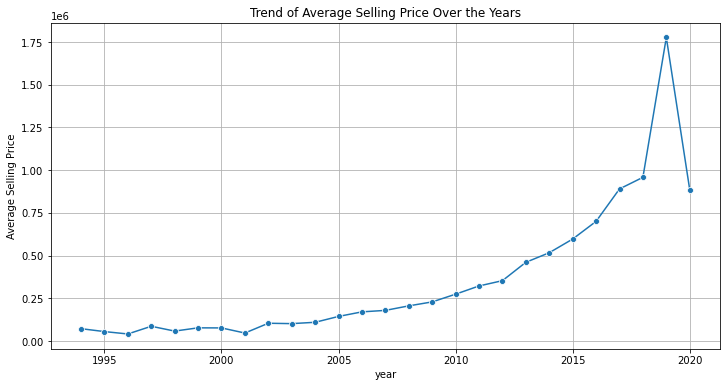

In [94]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_per_year, x='year', y='selling_price', marker='o')
plt.title('Trend of Average Selling Price Over the Years')
plt.xlabel('year')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.show()

# 7. Distribution Trends of average km driven over the years?

In [95]:
avg_km_per_year = ucd.groupby('year')['km_driven'].mean().reset_index()

In [96]:
print(avg_km_per_year)

    year      km_driven
0   1994   80000.000000
1   1995   70000.000000
2   1996   51000.000000
3   1997   99487.555556
4   1998   71111.111111
5   1999   89094.285714
6   2000  107276.333333
7   2001   48184.666667
8   2002   94492.894737
9   2003   95697.081081
10  2004   98883.274510
11  2005  104011.894737
12  2006  108693.568627
13  2007  115765.884393
14  2008   99125.134328
15  2009   98978.813853
16  2010  102048.992000
17  2011   96860.884211
18  2012   94988.974235
19  2013   85522.365269
20  2014   78887.977419
21  2015   71672.080000
22  2016   58877.210280
23  2017   46525.788119
24  2018   33916.936725
25  2019   16307.900515
26  2020   20525.716216


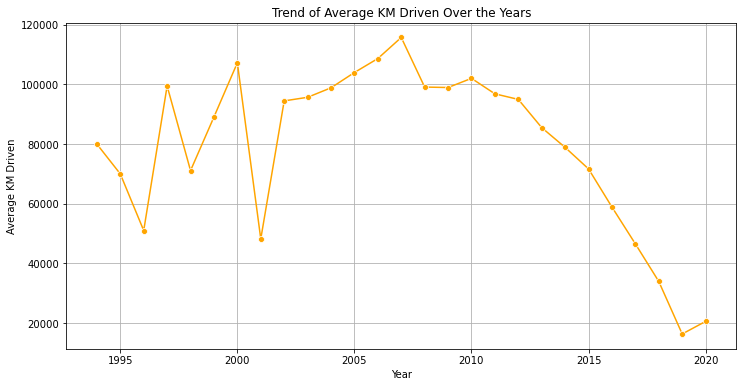

In [97]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_km_per_year, x='year', y='km_driven', marker='o', color='orange')
plt.title('Trend of Average KM Driven Over the Years')
plt.xlabel('Year')
plt.ylabel('Average KM Driven')
plt.grid(True)
plt.show()

# 8. What are the typical trends in mileage throughout the years?

In [98]:
avg_mileage_per_year = ucd.groupby('year')['mileage'].mean().reset_index()

In [99]:
print(avg_mileage_per_year)

    year    mileage
0   1994  14.450000
1   1995  16.100000
2   1996  16.100000
3   1997  16.066667
4   1998  15.933333
5   1999  15.964286
6   2000  16.733333
7   2001  16.700000
8   2002  16.327895
9   2003  15.778378
10  2004  15.952941
11  2005  15.943421
12  2006  16.174020
13  2007  16.614277
14  2008  16.542637
15  2009  17.011126
16  2010  17.504453
17  2011  18.026281
18  2012  19.102206
19  2013  19.296243
20  2014  19.722645
21  2015  20.136452
22  2016  20.293014
23  2017  20.864713
24  2018  21.024715
25  2019  19.918491
26  2020  19.833108


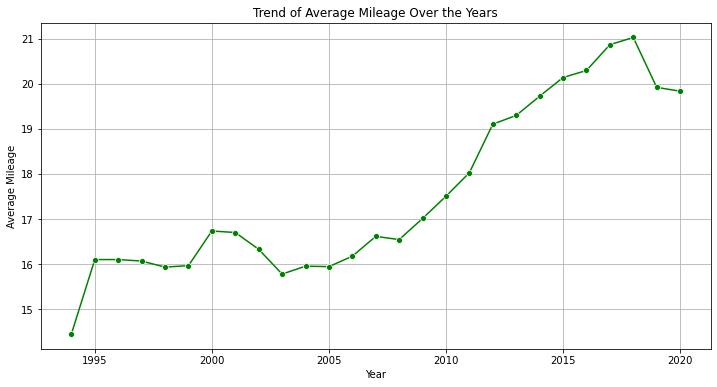

In [100]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_mileage_per_year, x='year', y='mileage', marker='o', color='green')
plt.title('Trend of Average Mileage Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Mileage')
plt.grid(True)
plt.show()

# 9. Top 5 Fuel with the Highest Number of Fuel has been used Over Time?

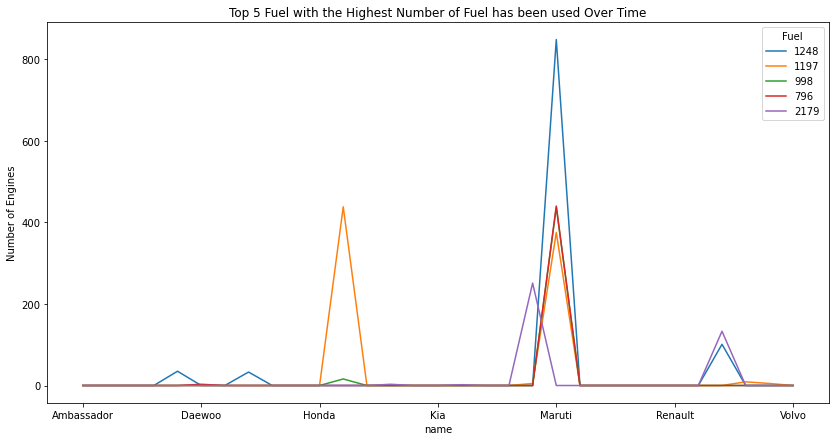

In [101]:
top_5_fuel_trend = ucd.groupby(['name', 'engine']).size().unstack().fillna(0)
top_5_fuel = top_5_fuel_trend.sum().sort_values(ascending=False).head(5).index
top_5_fuel_trend[top_5_fuel].plot(kind='line', figsize=(14, 7))
plt.title('Top 5 Fuel with the Highest Number of Fuel has been used Over Time')
plt.xlabel('name')
plt.ylabel('Number of Engines')
plt.legend(title='Fuel')
plt.show()

# SEASONAL TREND ANALYSIS

# 10.  What is the seasonal trend of average max power over the years in automobile industry?

In [102]:
avg_max_power_per_year = ucd.groupby('year')['max_power'].mean().reset_index()


In [103]:
print(avg_max_power_per_year)

    year   max_power
0   1994   44.500000
1   1995   37.000000
2   1996   37.000000
3   1997   49.666667
4   1998   48.888889
5   1999   53.785714
6   2000   48.093333
7   2001   43.500000
8   2002   58.515789
9   2003   68.829730
10  2004   70.956863
11  2005   77.257895
12  2006   80.700980
13  2007   78.251387
14  2008   81.149950
15  2009   83.308139
16  2010   85.013573
17  2011   87.883719
18  2012   86.536812
19  2013   88.651108
20  2014   89.951871
21  2015   92.668852
22  2016   92.549562
23  2017   97.277218
24  2018   95.964529
25  2019  114.106930
26  2020   93.640135


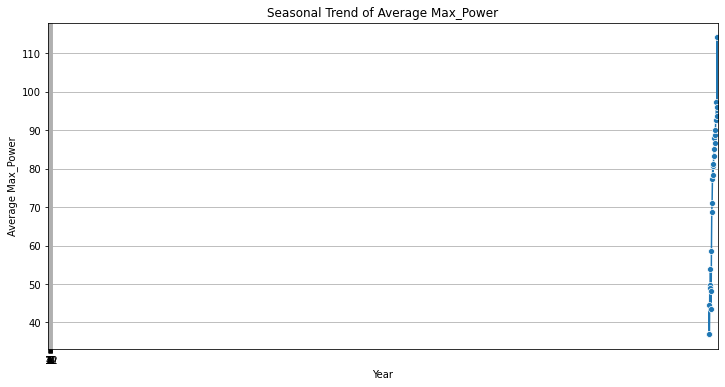

In [104]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_max_power_per_year, x='year', y='max_power', marker='o')
plt.title('Seasonal Trend of Average Max_Power')
plt.xlabel('Year')
plt.ylabel('Average Max_Power')
plt.grid(True)
plt.xticks(np.arange(1, 13, 1))
plt.show()

 # CORRELATION ANALYSIS 

# 11. What are the key relationships between different numeric variables in the dataset, as shown by the correlation matrix, and how do they impact the selling price of used cars?

In [105]:
numeric_columns = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
ucd[numeric_columns] = ucd[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [106]:
numeric_columns

['year',
 'selling_price',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats']

In [107]:
ucd = ucd.dropna(subset=numeric_columns)

In [108]:
ucd

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,Hyundai,2013,320000,110000,Central,Texas,Plano,Petrol,Individual,Manual,First_Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5,N
7902,8125,Hyundai,2007,135000,119000,Central,Texas,Port Arthur,Diesel,Individual,Manual,Fourth_Above_Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,N
7903,8126,Maruti,2009,382000,120000,Central,Texas,Port Arthur,Diesel,Individual,Manual,First_Owner,19.30,1248,73.90,190Nm@ 2000rpm,5,N
7904,8127,Tata,2013,290000,25000,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First_Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5,N


In [109]:
correlation_matrix = ucd[numeric_columns].corr()

In [110]:
print(correlation_matrix)

                   year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.412302  -0.428548  0.328544  0.018263   
selling_price  0.412302       1.000000  -0.222158 -0.126280  0.455682   
km_driven     -0.428548      -0.222158   1.000000 -0.172980  0.206031   
mileage        0.328544      -0.126280  -0.172980  1.000000 -0.576408   
engine         0.018263       0.455682   0.206031 -0.576408  1.000000   
max_power      0.226598       0.749674  -0.038159 -0.374621  0.703975   
seats         -0.007923       0.041617   0.227259 -0.451700  0.611103   

               max_power     seats  
year            0.226598 -0.007923  
selling_price   0.749674  0.041617  
km_driven      -0.038159  0.227259  
mileage        -0.374621 -0.451700  
engine          0.703975  0.611103  
max_power       1.000000  0.191999  
seats           0.191999  1.000000  


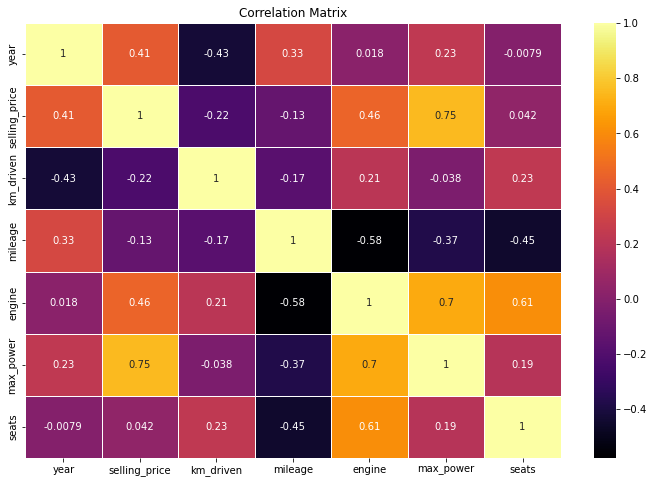

In [111]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 12. Does the Seller Type is correlated with the Selling Price in automobile industry?

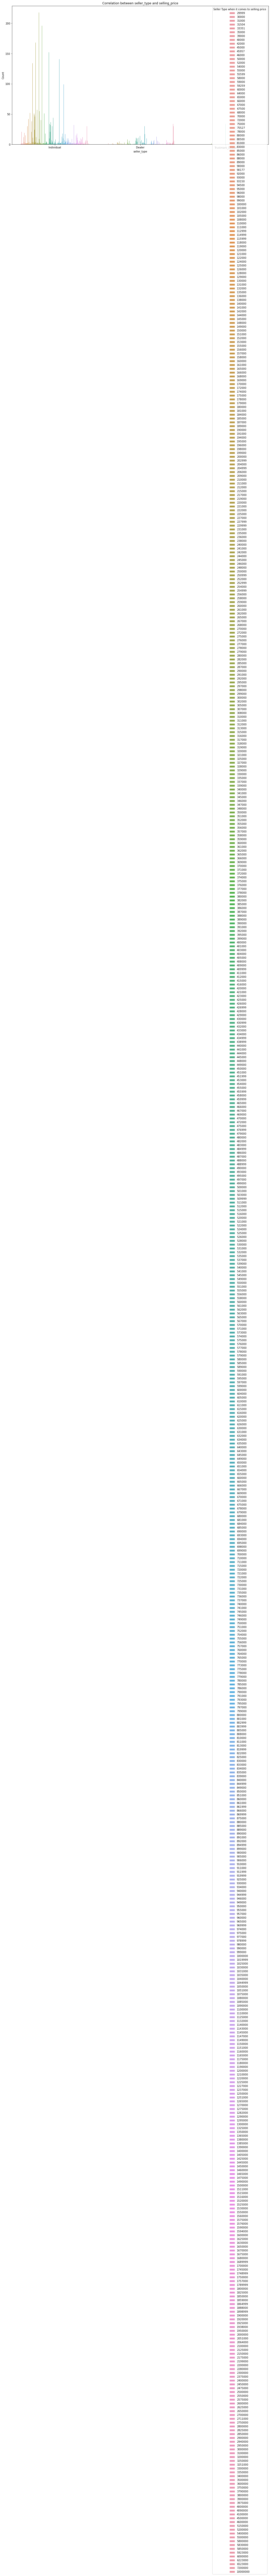

In [113]:
plt.figure(figsize=(18, 10))
sns.countplot(x='seller_type', hue='selling_price', data=ucd)
plt.title('Correlation between seller_type and selling_price')
plt.xlabel('seller_type')
plt.ylabel('Count')
plt.legend(title='Seller Type when it comes to selling price', loc='upper right')
plt.show()

In [121]:
print(f"Correlation between Seller Type and Selling Price: {correlation:.2f}")

Correlation between Seller Type and Selling Price: 0.04


# 13. Does the Year is correlated with the Selling Price in automobile industry?

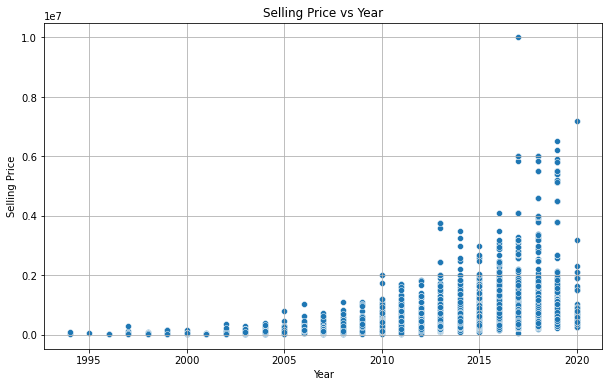

Correlation between Year and Selling Price: 0.04


In [122]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=ucd)
plt.title('Selling Price vs Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()
print(f"Correlation between Year and Selling Price: {correlation:.2f}")

# 14. Does the Seats is correlated with the Selling Price in automobile industry? Let's find out by the result on the Graph below.

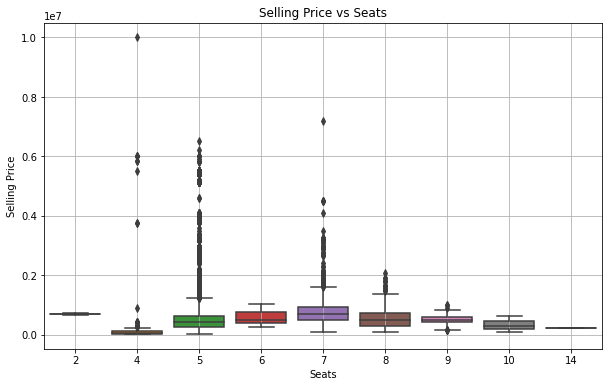

Correlation between selling_price and year: 0.41
Correlation between selling_price and km_driven: -0.22
Correlation between selling_price and mileage: -0.13
Correlation between selling_price and engine: 0.46
Correlation between selling_price and max_power: 0.75
Correlation between selling_price and seats: 0.04


In [117]:
# Selling Price vs Seats
plt.figure(figsize=(10, 6))
sns.boxplot(x='seats', y='selling_price', data=ucd)
plt.title('Selling Price vs Seats')
plt.xlabel('Seats')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

# Interpretation of the correlation matrix and scatter plots
for column in numeric_columns:
    if column != 'selling_price':
        correlation = correlation_matrix.loc['selling_price', column]
        print(f"Correlation between selling_price and {column}: {correlation:.2f}")

# 15. Does the Engine is correlated with the Selling Price? 

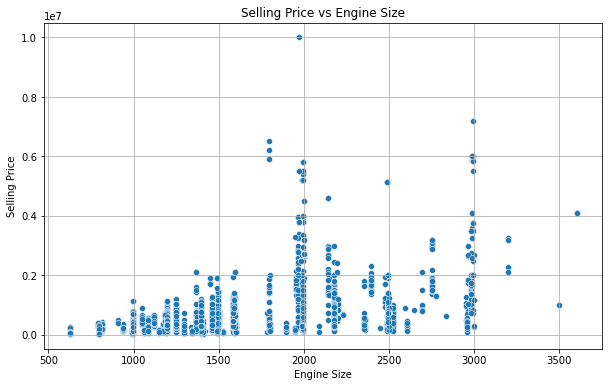

In [118]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine', y='selling_price', data=ucd)
plt.title('Selling Price vs Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()


In [119]:
print(f"Correlation between Engine Size and Selling Price: {correlation:.2f}")


Correlation between Engine Size and Selling Price: 0.04
